In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

df = pd.read_csv("CarPrice_Assignment.csv")

df.drop(columns=['car_ID'], inplace=True)

df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())
df.drop(columns=['CarName'], inplace=True)

df = pd.get_dummies(df, columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 
                                 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarBrand'], 
                    drop_first=True)

X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_toyouta,CarBrand_vokswagen,CarBrand_volkswagen,CarBrand_volvo,CarBrand_vw
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,False,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,False,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,False,False,False,False,False,False,False,False,True,False
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,False,False,False,False,False,False,False,False,True,False
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,False,False,False,False,False,False,False,False,True,False
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,False,False,False,False,False,False,False,False,True,False


In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42, n_estimators=100),
    "Support Vector Regressor": SVR(kernel='rbf')
}


In [12]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "R-squared": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                             R-squared           MSE          MAE
Linear Regression             0.909597  7.136800e+06  1820.619487
Decision Tree Regressor       0.883730  9.178813e+06  2070.187000
Random Forest Regressor       0.957563  3.350118e+06  1296.539463
Gradient Boosting Regressor   0.928584  5.637845e+06  1686.942854
Support Vector Regressor     -0.101981  8.699478e+07  5707.136438


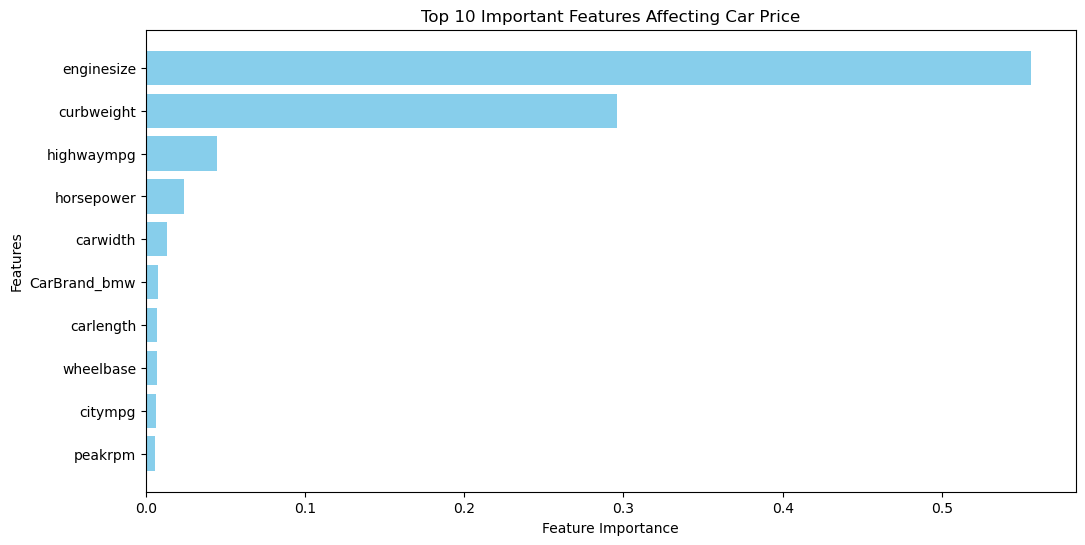

In [13]:
rf_model = models["Random Forest Regressor"]
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = np.array(X.columns)[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

plt.figure(figsize=(12, 6))
plt.barh(sorted_features[:10], sorted_importances[:10], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 10 Important Features Affecting Car Price")
plt.show()


In [15]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, 
                           cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.89137467080074
